<a href="https://colab.research.google.com/github/sungjin-kim-data/vgames2_data/blob/master/vgames2_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **성진이가 다니고 있는 게임 회사**

## **게임 데이터를 확인 후 액션이 어떻게 이루어져야하는지 확인할 것**

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답
3. 출고량의 높은 게임에 대한 분석 및 시각화 프로세스 포함

=> 결론 : 다음 분기에 어떤 게임을 설계해야 하는지를 제시하셔야 합니다.

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# import matplotlib.font_manager as fm
# fm.fontManager.ttflist
# [f.name for f in fm.fontManager.ttflist]

In [4]:
# 데이터 불러오기
gd = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
gd.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
# columns 소문자로 변경

gd.columns = gd.columns.str.lower()
gd.columns

Index(['unnamed: 0', 'name', 'platform', 'year', 'genre', 'publisher',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
      dtype='object')

In [6]:
gd

,unnamed: 0,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


columns

  - Name : 게임의 이름
  - Platform : 게임이 지원되는 플랫폼의 이름
  - Year : 게임이 출시된 연도
  - Genre : 게임의 장르
  - Publisher : 게임을 제작한 회사
  - NA_Sales : 북미지역에서의 출고량
  - EU_Sales : 유럽지역에서의 출고량
  - JP_Sales : 일본지역에서의 출고량
  - Other_Sales : 기타지역에서의 출고량

## **데이터 확인 및 정제**

In [7]:
# 필요없는 컬럼 제거
gd.drop('unnamed: 0', axis=1,inplace=True)

In [8]:
# 정보 확인
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         16598 non-null  object 
 1   platform     16598 non-null  object 
 2   year         16327 non-null  float64
 3   genre        16548 non-null  object 
 4   publisher    16540 non-null  object 
 5   na_sales     16598 non-null  object 
 6   eu_sales     16598 non-null  object 
 7   jp_sales     16598 non-null  object 
 8   other_sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [9]:
# object describe
gd.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,name,platform,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
count,16598,16598,16548,16540,16598,16598,16598,16598
unique,11493,31,12,578,494,363,282,190
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts,0,0,0,0
freq,12,2163,3305,1351,4443,5665,10333,6386


In [10]:
# gd 내용 정리해서 출력

print("총 데이터 수 :", gd.shape[0]*gd.shape[1])
print("총 결측치 수 : {} / 전체 데이터의 {:.2f}%".format(gd.isnull().sum().sum(), (gd.isnull().sum().sum()*100)/(gd.shape[0]*gd.shape[1])))
print("전체 게임 수: ", gd.name.nunique())
print("전체 플랫폼의 수: ", gd.platform.nunique())

총 데이터 수 : 149382
총 결측치 수 : 379 / 전체 데이터의 0.25%
전체 게임 수:  11493
전체 플랫폼의 수:  31


In [11]:
# 결측치 확인
gd.isnull().sum(axis=0)

name             0
platform         0
year           271
genre           50
publisher       58
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
dtype: int64

In [12]:
# 총 379개의 결측치 존재 전체 데이터의 0.25% 차지 그렇기에 결측치를 제거하여도 분석에 그렇게 크게 영향을 미칠것으로 판단되지 않음
# 즉, 결측치는 제거하는 것으로 판다

In [13]:
# 결측치 컬럼 내용 확인
gd[gd.isnull().any(axis=1)].head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01


In [14]:
gd1 = gd.dropna()
gd1 = gd1.reset_index(drop=True)
gd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         16241 non-null  object 
 1   platform     16241 non-null  object 
 2   year         16241 non-null  float64
 3   genre        16241 non-null  object 
 4   publisher    16241 non-null  object 
 5   na_sales     16241 non-null  object 
 6   eu_sales     16241 non-null  object 
 7   jp_sales     16241 non-null  object 
 8   other_sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [15]:
# 결측치 정상 제거 확인
gd1.isnull().sum()

name           0
platform       0
year           0
genre          0
publisher      0
na_sales       0
eu_sales       0
jp_sales       0
other_sales    0
dtype: int64

In [16]:
# Year int로 변경
gd1['year'] = gd1['year'].astype('int64')
gd1.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [17]:
gd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         16241 non-null  object
 1   platform     16241 non-null  object
 2   year         16241 non-null  int64 
 3   genre        16241 non-null  object
 4   publisher    16241 non-null  object
 5   na_sales     16241 non-null  object
 6   eu_sales     16241 non-null  object
 7   jp_sales     16241 non-null  object
 8   other_sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [18]:
# 음수 값 확인
print(min(gd1['na_sales']), max(gd1['na_sales']))
print(min(gd1['eu_sales']), max(gd1['eu_sales']))
print(min(gd1['jp_sales']), max(gd1['jp_sales']))
print(min(gd1['other_sales']), max(gd1['other_sales']))

0 90K
0 960K
0 90K
0 80K


In [19]:
# Year int로 변경
gd1['year'] = gd1['year'].astype('int64')
gd1

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [20]:
# year 정제
gd1.query('year < 10')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
758,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
1001,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0,0.01
1204,Ratchet & Clank: Going Commando,PS2,3,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1343,LEGO Star Wars II: The Original Trilogy,PS2,6,Action,LucasArts,1.85,0.64,0.01,0.19
1388,Rogue Warrior,PS3,9,Shooter,Bethesda Softworks,0.11,0.02,0,0.01
1656,SpongeBob SquarePants featuring Nicktoons: Glo...,PS2,8,Action,THQ,0.29,0.22,0,0.07
2206,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
2408,SOCOM: U.S. Navy SEALs Fireteam Bravo 2,PSP,6,Shooter,Sony Computer Entertainment,0.81,0.11,0,0.13
2421,Splat Renegade Paintball,XB,5,Sports,Take-Two Interactive,0.04,0.01,0,0


In [21]:
# year 잘못 기입된 index 추출
year = gd1.query('year < 10').index
year

Int64Index([   72,   758,  1001,  1204,  1343,  1388,  1656,  2206,  2408,
             2421,  2497,  2790,  3051,  3671,  3801,  3995,  4644,  4698,
             5200,  6005,  6912,  7032,  7215,  7451,  7689,  7983,  8341,
             8412,  8507,  8591,  8735,  8751,  8902,  9094,  9143,  9700,
            10151, 10200, 10939, 11010, 12234, 12372, 13447, 13855, 14352,
            14930, 14933, 15105, 15173, 15273, 15756, 15801, 16042],
           dtype='int64')

In [22]:
# 2000 추가
gd1.loc[year, 'year'] = 2000 + gd1.loc[year, 'year']

In [23]:
# 2022 기준으로 2자리 숫 year 출력
gd1.query('year < 22')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
2965,Toaru Kagaku no Chou Denjihou,PSP,11,Adventure,Kadokawa Shoten,0,0,0.06,0
2988,Kamen Rider Battle: Ganbaride,DS,10,Strategy,Namco Bandai Games,0,0,0.14,0
3929,Uncharted 4: A Thief's End,PS4,16,Shooter,Sony Computer Entertainment,1.3M,2.07,0.18,0.65
4229,Gunblade NY & L.A. Machineguns Arcade Hits Pack,Wii,10,Shooter,Sega,0.06,0.01,0,0.01
4625,NBA 2K15,PS4,14,Sports,Take-Two Interactive,1.46,0.54,0.01,0.37
5083,Omega Labyrinth,PSV,15,Role-Playing,D3Publisher,0,0,0.05,0
5824,F.E.A.R. 3,X360,11,Shooter,Warner Bros. Interactive Entertainment,0.3,0.11,0.01,0.04
5989,Kingdom Hearts: Birth by Sleep,PSP,10,Role-Playing,Square Enix,0.63,0.42,0.75,0.26


In [24]:
year2 = gd1.query('year < 22').index
year2

Int64Index([  210,   299,  2965,  2988,  3929,  4229,  4625,  5083,  5824,
             5989,  6033,  6065,  6758,  7038,  7406,  7477,  8030,  8379,
             8664,  9109, 10199, 10410, 10596, 10703, 11037, 11283, 11712,
            12124, 12599, 14915, 15110, 15151, 15493],
           dtype='int64')

In [25]:
# 2000 추가
gd1.loc[year2, 'year'] = 2000 + gd1.loc[year2, 'year']

In [26]:
gd1.query('year < 22')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales


In [27]:
# 마지막으로 1900년대 2자리 숫자 출력
gd1.query('year < 100')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
894,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96,Racing,ASCII Entertainment,0,0,0.9,0
2383,Casper,PS,96,Adventure,Interplay,0.46,0.31,0,0.05
3423,Glover,N64,98,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4274,Adventure Island,NES,86,Platform,Hudson Soft,0,0,1.05,0
4705,Virtua Cop,SAT,95,Shooter,Sega,0,0,0.62,0
4737,Mobile Suit Gundam,PS,95,Action,Namco Bandai Games,0,0,0.42,0.03
10113,AeroFighters Assault,N64,97,Action,Video System,0.15,0.04,0,0
10493,3D Baseball,PS,96,Sports,BMG Interactive Entertainment,0.02,0.01,0,0
11104,Super Fire ProWrestling X,SNES,95,Fighting,Human Entertainment,0,0,0.28,0


In [28]:
year3 = gd1.query('year < 100').index
year3

Int64Index([   79,   894,  2383,  3423,  4274,  4705,  4737, 10113, 10493,
            11104, 14261, 14470, 15641, 16127],
           dtype='int64')

In [29]:
gd1.loc[year3, 'year'] = 1900 + gd1.loc[year3, 'year']

In [30]:
gd1.loc[year3]

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
79,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01
894,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,0.9,0
2383,Casper,PS,1996,Adventure,Interplay,0.46,0.31,0,0.05
3423,Glover,N64,1998,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4274,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1.05,0
4705,Virtua Cop,SAT,1995,Shooter,Sega,0,0,0.62,0
4737,Mobile Suit Gundam,PS,1995,Action,Namco Bandai Games,0,0,0.42,0.03
10113,AeroFighters Assault,N64,1997,Action,Video System,0.15,0.04,0,0
10493,3D Baseball,PS,1996,Sports,BMG Interactive Entertainment,0.02,0.01,0,0
11104,Super Fire ProWrestling X,SNES,1995,Fighting,Human Entertainment,0,0,0.28,0


### 이제 sales를 정제하려고 한다 엑셀 대충 데이터를 확인 했을 때 K, M 
### 그리고 0.xx 같은 통합되어 있지 않은 데이터들이라 전부 통일시켜준다

In [31]:
# salse의 경우 전부 백만 단위로 변경
pd.set_option('display.max_rows', 50)
# 먼저 na_sales 부터 시작
# 뒤에 K가 붙는 row 추출
gd1[gd1['na_sales'].str.endswith('K') == True]

# 0K라고 추출 했을 때 0K는 사실 뒤에 K라는 단위가 붙지만 첫번째 자리가 0인 것을 감안해 무의미한 데이터라고 간부 'K'를 전부

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
866,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0
1071,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15308,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0K,0.01,0,0
15846,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,120K,0.15,0,0.06
15978,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16137,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [32]:
# K = 1000 변경
gd1['na_sales'] = gd1['na_sales'].str.replace("K", '000')

In [33]:
# 변경 확인
gd1['na_sales'].iloc[10]

'480000'

In [34]:
# M 문자열 삭제
gd1['na_sales'] = gd1['na_sales'].str.replace("M", '')

In [35]:
# 다른 문자열 있는지 확인
gd1[gd1.na_sales.str.contains(r'[a-zA-Z]')]

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales


In [36]:
# 타입 변경 (float)
gd1 = gd1.astype({'na_sales':'float'})

In [37]:
# 나머지rows 백만단위로 변경
k_error = gd1.query('na_sales < 1000').index
k_error

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16172)

In [38]:
k_error

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16172)

In [39]:
# 백만 단위로 전부 통일
gd1.loc[k_error, 'na_sales'] = 1000000 * gd1.loc[k_error, 'na_sales']

In [40]:
# 타입 변경 (int) / 소수점 지우기
gd1 = gd1.astype({'na_sales':'int'})

In [41]:
# 동일한 방법으로 [en_sales, jp_sales, other_sales] 변경
gd1

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,0.05,0.25,0.03


In [42]:
# eu_sales
gd1[gd1['eu_sales'].str.endswith('K') == True]

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
125,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0,0K,0.01,0
135,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,40000,50K,0.04,0.02
494,New Super Luigi U,WiiU,2013,Platform,Nintendo,1270000,620K,0.18,0.16
959,Smarty Pants,Wii,2007,Misc,Electronic Arts,530000,760K,0,0.16
983,Clock Tower 3,PS2,2002,Adventure,Capcom,100000,80K,0.12,0.03
...,...,...,...,...,...,...,...,...,...
15771,Monsters vs. Aliens,PS3,2009,Action,Activision,210000,60K,0,0.03
15781,The Sims 2: Ikea Home Stuff,PC,2008,Simulation,Electronic Arts,0,70K,0,0.02
15809,The Suffering,PS2,2004,Action,Midway Games,200000,160K,0,0.05
16022,Kill.Switch,XB,2003,Shooter,Namco Bandai Games,180000,50K,0,0.01


In [43]:
# K = 1000 변경
gd1['eu_sales'] = gd1['eu_sales'].str.replace("K", '000')

In [44]:
# M 삭제
gd1['eu_sales'] = gd1['eu_sales'].str.replace("M", "")

In [45]:
# 타입 변경 (float)
gd1 = gd1.astype({'eu_sales':'float'})

In [46]:
# 나머지rows 백만단위로 변경
k_error1 = gd1.query('eu_sales < 1000').index
k_error1

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16176)

In [47]:
# 백만 단위로 전부 통일
gd1.loc[k_error1, 'eu_sales'] = 1000000 * gd1.loc[k_error1, 'eu_sales']

In [48]:
# 타입 변경 (int) / 소수점 지우기
gd1 = gd1.astype({'eu_sales':'int'})

In [49]:
# jp_sales
# K = 1000
gd1['jp_sales'] = gd1['jp_sales'].str.replace("K", "000")

In [50]:
# M 삭제
gd1['jp_sales'] = gd1['jp_sales'].str.replace("M", "")

In [51]:
# float로 type 변경
gd1 = gd1.astype({'jp_sales':'float'})

In [52]:
k_error2 = gd1.query('jp_sales < 1000').index
k_error2

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16202)

In [53]:
# 백만 단위로 전부 통일
gd1.loc[k_error2, 'jp_sales'] = 1000000 * gd1.loc[k_error2, 'jp_sales']

In [54]:
# int로 type 변경
gd1 = gd1.astype({'jp_sales':'int'})

In [55]:
# other_sales
# K = 1000
gd1['other_sales'] = gd1['other_sales'].str.replace("K", "000")

In [56]:
# M 삭제
gd1['other_sales'] = gd1['other_sales'].str.replace("M", "")

In [57]:
# float로 type 변경
gd1 = gd1.astype({'other_sales':'float'})

In [58]:
k_error3 = gd1.query('other_sales < 1000').index
k_error3

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16230, 16231, 16232, 16233, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16193)

In [59]:
# 백만 단위로 변경
gd1.loc[k_error3, 'other_sales'] = 1000000 * gd1.loc[k_error3, 'other_sales']

In [60]:
# int로 type 변경
gd1 = gd1.astype({'other_sales':'int'})

In [61]:
# sales 전부 백만 단위로 변경 
# total_sales columns 추가하여 전세계 단위 판매량 확인

gd1['total_sales'] = gd1['na_sales'] + gd1['eu_sales'] + gd1['jp_sales'] + gd1['other_sales']

In [62]:
gd1

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [63]:
gd1.sort_values(by='total_sales', ascending=False)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
...,...,...,...,...,...,...,...,...,...,...
8659,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10000,0,0,0,10000
2823,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10000,0,0,0,10000
2837,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10000,0,0,0,10000
11632,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0,10000,0,0,10000


## **시각화**

In [64]:
# 장르별 게임 수
gd1['genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: genre, dtype: int64

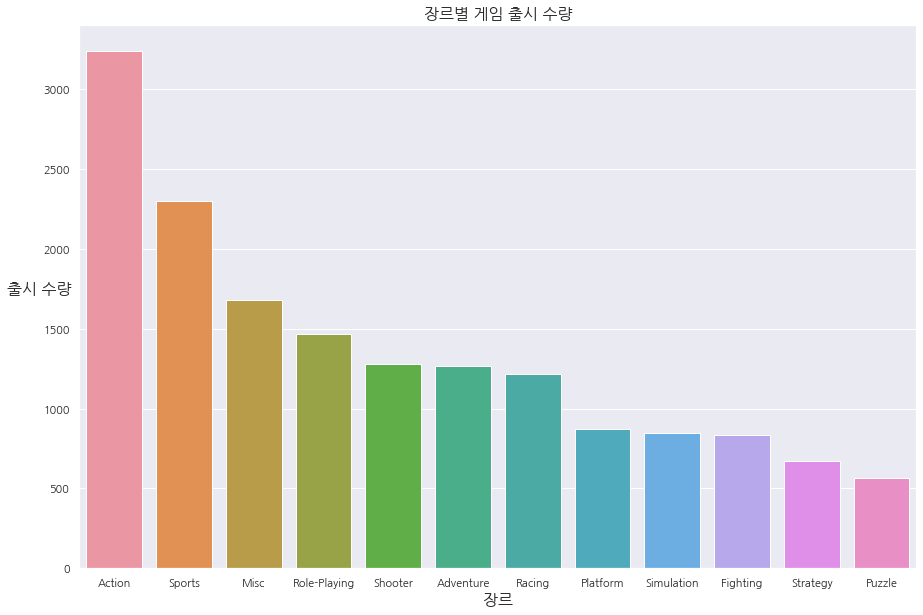

In [78]:
plt.figure(figsize=(15, 10))
sns.countplot(x="genre", data=gd1, order = gd1['genre'].value_counts().index)
plt.title('장르별 게임 출시 수량', fontsize=16)
plt.xlabel('장르', fontsize=16)
plt.ylabel('출시 수량', rotation=0, fontsize=16)
plt.show()

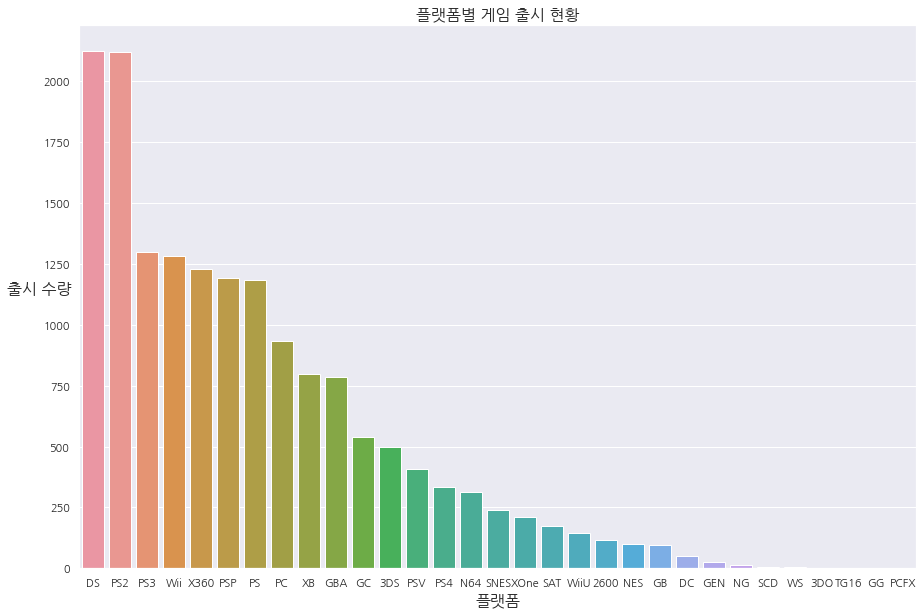

In [77]:
plt.figure(figsize=(15, 10))
sns.countplot(x="platform", data=gd1, order = gd1['platform'].value_counts().index)
plt.title('플랫폼별 게임 출시 현황', fontsize=16)
plt.xlabel('플랫폼', fontsize=16)
plt.ylabel('출시 수량', rotation=0, fontsize=16)
plt.show()

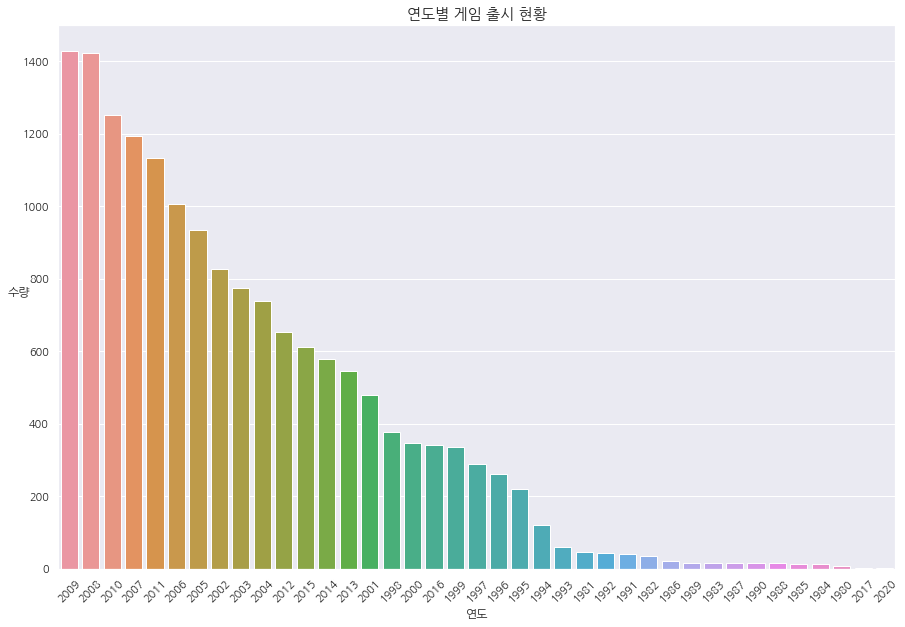

In [67]:
plt.figure(figsize=(15, 10))
sns.countplot(x="year", data=gd1, order = gd1.groupby(by=['year'])['name'].count().sort_values(ascending=False).index)
plt.title('연도별 게임 출시 현황', fontsize=15)
plt.xlabel('연도', rotation=0)
plt.ylabel('수량', rotation=0)
plt.xticks(rotation=45)
plt.show()

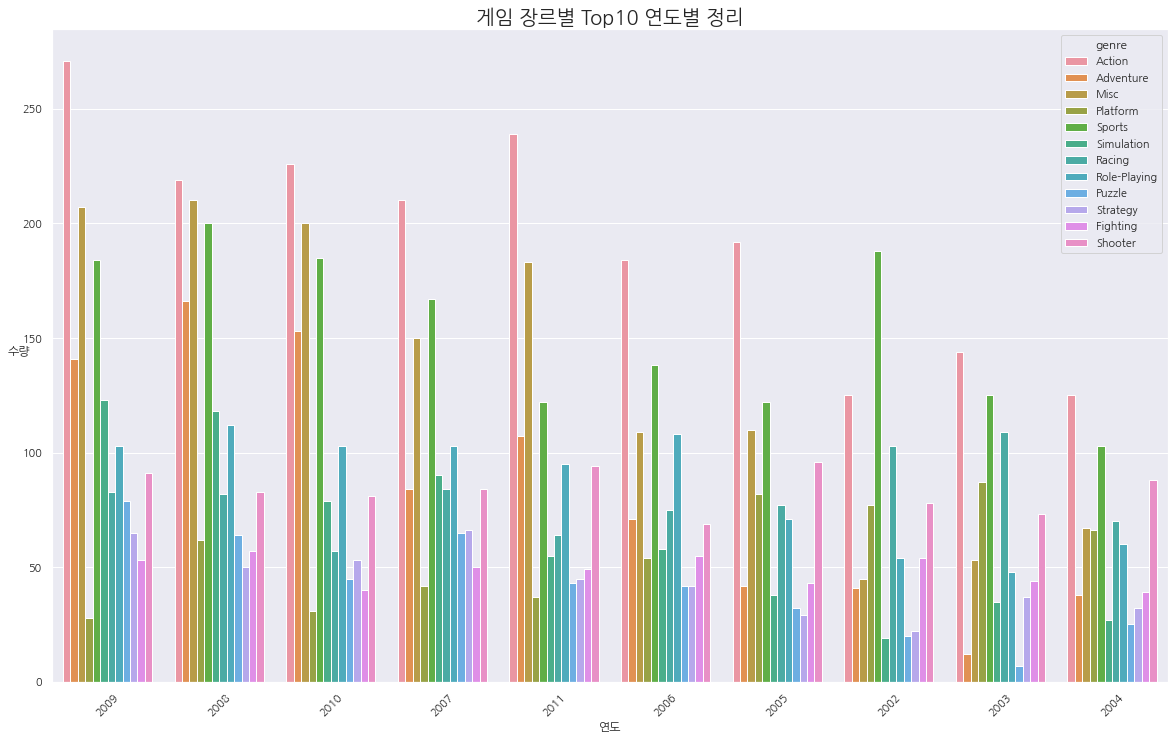

In [68]:
plt.figure(figsize=(20, 12))
sns.countplot(x="year", data=gd1, hue='genre', order=gd1.year.value_counts().iloc[:10].index)
plt.title('게임 장르별 Top10 연도별 정리', fontsize=20)
plt.xlabel('연도')
plt.ylabel('수량', rotation=0)
plt.xticks(rotation=45)
plt.show()

In [69]:
gd1.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
      dtype='object')

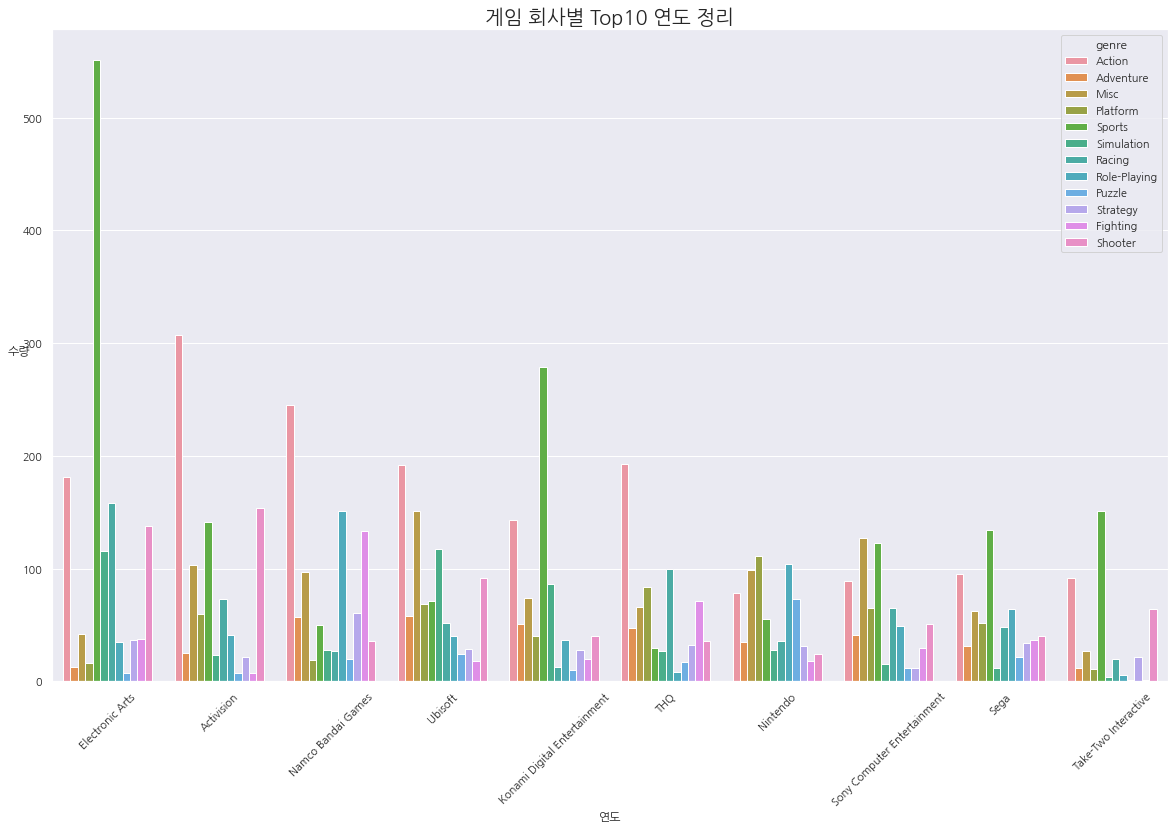

In [81]:
plt.figure(figsize=(20, 12))
sns.countplot(x="publisher", data=gd1, hue='genre', order=gd1.publisher.value_counts().iloc[:10].index)
plt.title('게임 회사별 Top10 연도 정리', fontsize=20)
plt.xlabel('연도')
plt.ylabel('수량', rotation=0)
plt.xticks(rotation=45)
plt.show()

In [71]:
# 2002년을 제외한 Top10 연도는 전부 액션 게임이 1등이다.

In [72]:
top_game_sale = gd1
top_game_sale = top_game_sale[['name', 'year', 'genre', 'total_sales']]
top_game_sale = top_game_sale.sort_values(by=['total_sales'], ascending=False)
top_game_sale = top_game_sale.head(20)
top_game_sale.index

Int64Index([ 2855,  4113, 12316,  3288,  7673,  1187,  6796,  2959, 16176,
            10280, 10914, 10438,  9233,  3367, 10681,  4253,  3414, 14355,
            12837, 12950],
           dtype='int64')

In [73]:
name = top_game_sale['name']
year = top_game_sale['year']
y = np.arange(0, 20)

top_game_sale['total_sales'].iloc[0]
top_game_sale.index[0]
name.iloc[2]

'Mario Kart Wii'

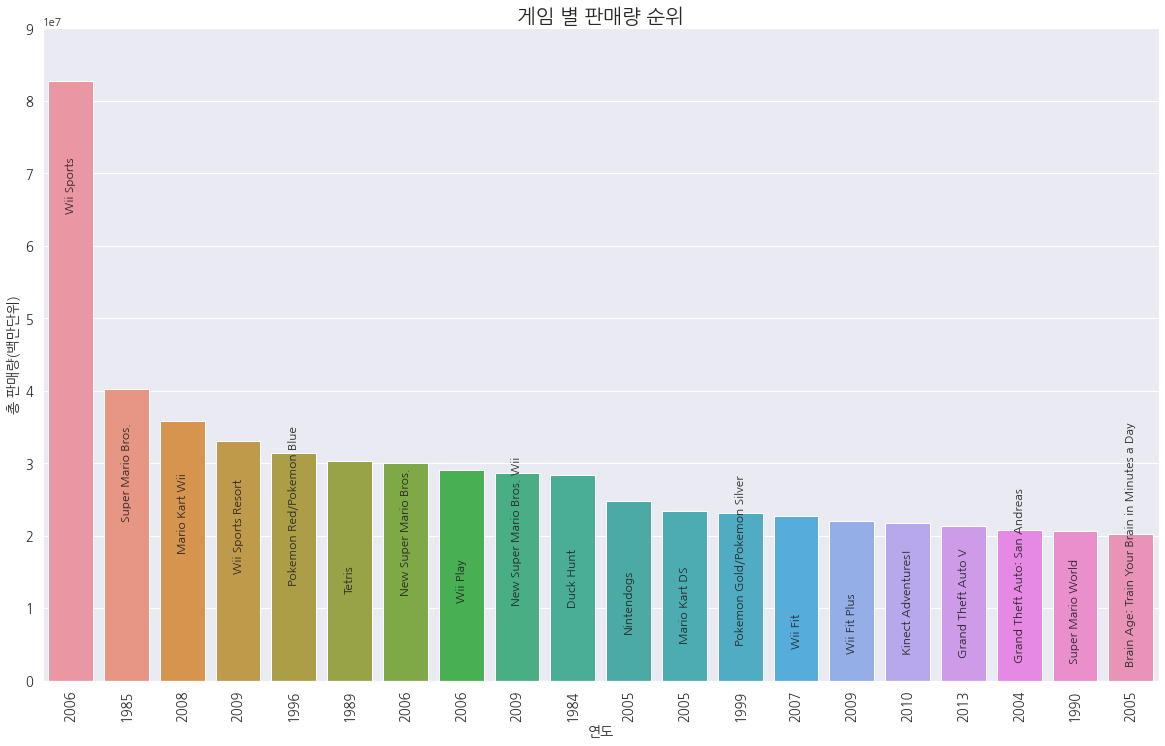

In [74]:
plt.figure(figsize=(20,12))
g = sns.barplot(x='name', y='total_sales', data=top_game_sale)

idx = 0
for value in top_game_sale['total_sales']:
  g.text(idx, value-18000000, name.iloc[idx], rotation=90, ha='center')
  idx += 1


# g.text(1, top_game_sale['total_sales'].iloc[0], 'Hey!', ha="center")
plt.title('게임 별 판매량 순위', fontsize=20)
plt.xticks(y, top_game_sale['year'], fontsize=13, rotation=90)
plt.yticks(fontsize=13)
plt.xlabel('연도', fontsize=14)
plt.ylabel('총 판매량(백만단위)', fontsize=14)
plt.ylim(0, 90000000)
plt.show()

In [87]:
gd1_top = gd1.sort_values(by=['total_sales'], ascending=False)
gd1_top.reset_index(drop=True)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
...,...,...,...,...,...,...,...,...,...,...
16236,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10000,0,0,0,10000
16237,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10000,0,0,0,10000
16238,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10000,0,0,0,10000
16239,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0,10000,0,0,10000


In [97]:
gd_genre = gd1[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
gd_map = gd_genre.groupby(by=['genre']).sum()
gd_map.reset_index()

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,858749997,513639997,156600000,183989998
1,Adventure,101790000,63660000,51870000,16700000
2,Fighting,220349998,99900000,87140000,36150000
3,Misc,394729999,208150000,104180000,72639999
4,Platform,445379999,200629999,130529999,51450000
5,Puzzle,121579999,50470000,56240000,12440000
6,Racing,354699997,235019999,56320000,76510000
7,Role-Playing,318759999,183089998,342929999,56730000
8,Shooter,574479997,310229996,38180000,101860000
9,Simulation,181429998,112990000,63540000,31320000


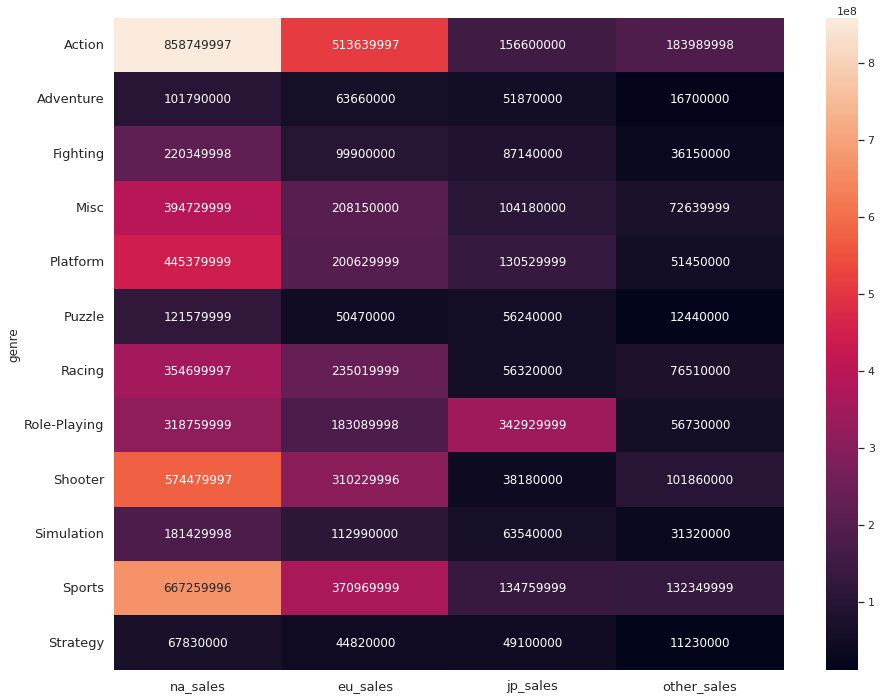

In [96]:
plt.figure(figsize=(15, 12))
sns.set(font_scale = 1)
sns.heatmap(gd_map, annot=True, fmt='.0f')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()